In [19]:
import numpy as np
from array import array
import os
import sys
import ROOT
from scipy.spatial import distance
from scipy.stats import chi2
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle,  TFile, gSystem
from fastSimulation import *

In [20]:
folder="${fastMCKalman}/data/testTPCmuons/fixedpt15/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/"
foldercheck="${fastMCKalman}/data/testTPCmuons/fixedpt15/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Covariance/"
#folder="/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCSA/"
inputData = folder+"fastParticle.list"
ROOT.initTreeFast(inputData)
tree=ROOT.treeFast
treeSeed = ROOT.treeSeed

Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt15/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt15/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt15/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt15/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/MC_00005smear_noEl

In [21]:
tree.SetMarkerStyle(25)
tree.SetMarkerSize(0.5)
ROOT.setAliases(tree)
tree.SetAlias("p0MC","part.fParamMC[1].fP[0]")
tree.SetAlias("p0In","part.fParamIn[1].fP[0]")

tree.SetAlias("p1MC","part.fParamMC[1].fP[1]")
tree.SetAlias("p1In","part.fParamIn[1].fP[1]")

tree.SetAlias("p2MC","part.fParamMC[1].fP[2]")
tree.SetAlias("p2In","part.fParamIn[1].fP[2]")

tree.SetAlias("p3MC","part.fParamMC[1].fP[3]")
tree.SetAlias("p3In","part.fParamIn[1].fP[3]")

tree.SetAlias("p4MC","part.fParamMC[1].fP[4]")
tree.SetAlias("p4In","part.fParamIn[1].fP[4]")

tree.SetAlias("pMC","part.fParamMC[1].fData.P()")
tree.SetAlias("pIn","part.fParamIn[1].fData.P()")

tree.SetAlias("Res0MC","(p0In-p0MC)/p0MC")
tree.SetAlias("Res1MC","(p1In-p1MC)/p1MC")
tree.SetAlias("Res2MC","(p2In-p2MC)/p2MC")
tree.SetAlias("Res3MC","(p3In-p3MC)/p3MC")
tree.SetAlias("Res4MC","(p4In-p4MC)/p4MC")
tree.SetAlias("RespMC","(pIn-pMC)/pMC")

tree.SetAlias("Unit0MC","(p0In-p0MC)/sqrt(part.fParamIn[1].fC[0])")
tree.SetAlias("Unit1MC","(p1In-p1MC)/sqrt(part.fParamIn[1].fC[2])")
tree.SetAlias("Unit2MC","(p2In-p2MC)/sqrt(part.fParamIn[1].fC[5])")
tree.SetAlias("Unit3MC","(p3In-p3MC)/sqrt(part.fParamIn[1].fC[9])")
tree.SetAlias("Unit4MC","(p4In-p4MC)/sqrt(part.fParamIn[1].fC[14])")

tree.SetAlias("sigmaqPt0","sqrt(part.fParamIn[1].fC[14])")
tree.SetAlias("sigmaPtRel0","sigmaqPt0*ptMC")
tree.SetAlias("LArm","getStat(2)")

tree.SetAlias("isOK","part.fStatusMaskIn.fData[1]==31")
#part.fStatusMaskIn.fData[1]==31

True

# Testing the M distances between the parameters

## First the whole matrix

In [22]:
gStyle.SetOptStat(1)
tree.SetMarkerStyle(25)
tree.SetMarkerSize(0.5)
hDistance   = ROOT.TH1D( 'hDistance', 'Distance', 200, 0,25 )


def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

for iev in range(treeSeed.GetEntries()):
    treeSeed.GetEntry(iev)
    #size = treeSeed.seed.AliExternalTrackParam.size() 
    if(tree.part.fStatusMaskIn[1]!=31): continue
    C=[]
    xMC=[]
    xSeed=[]

    #treeSeed.Print()
    for i in range(15): 
        C.append(tree.part.fParamIn[1].GetCovariance()[i]) 
        #print(tree.part.fParamIn[1].GetCovariance()[i])

    for i in range(5): 
        xMC.append(treeSeed.part.fParamMC[1].GetParameter()[i]) 
        xSeed.append(treeSeed.part.fParamIn[1].GetParameter()[i]) 

    S = np.array([[C[0], C[1], C[3], C[6], C[10]],
                  [C[1], C[2], C[4], C[7], C[11]],
                  [C[3], C[4], C[5], C[8], C[12]],
                  [C[6] ,C[7], C[8], C[9], C[13]],
                  [C[10],C[11],C[12],C[13],C[14]]])

    
    #print(S)
    Sinv = np.linalg.inv(S)

    c = distance.mahalanobis(xMC,xSeed,Sinv)
    hDistance.Fill(c*c)
 
    

 FCN=257.98 FROM MIGRAD    STATUS=CONVERGED      55 CALLS          56 TOTAL
                     EDM=1.29703e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.18096e+00   3.59681e-02   2.82625e-04  -3.76275e-04
   2  p1           9.11493e+02   1.06763e+01   8.38921e-02   8.19198e-07


Warning in <TCanvas::Constructor>: Deleting canvas with same name: hd
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt15/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Covariance/MDistanceKalman.png has been created


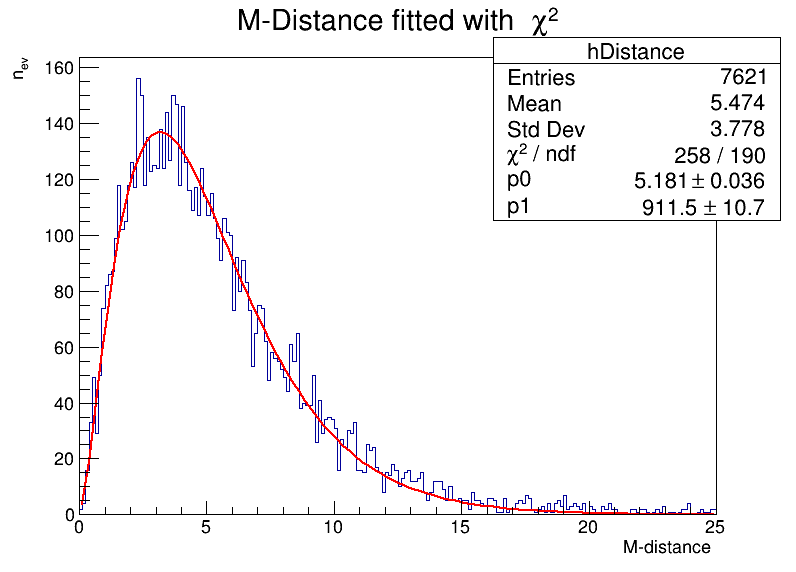

In [23]:
formula = "[1]*ROOT::Math::chisquared_pdf(x,[0])"
fchi2 = ROOT.TF1("fchi2",formula,0,25)
fchi2.SetParameters(5,10000)
  
hd = ROOT.TCanvas("hd","hd",800,600)
hDistance.SetTitle("M-Distance fitted with #chi^{2};M-distance;n_{ev}")
#fchi2.Draw()
hDistance.Draw()
hDistance.Fit("fchi2")

hd.Draw()
save=foldercheck+"MDistanceKalman"+".png"
hd.Print(save)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hq


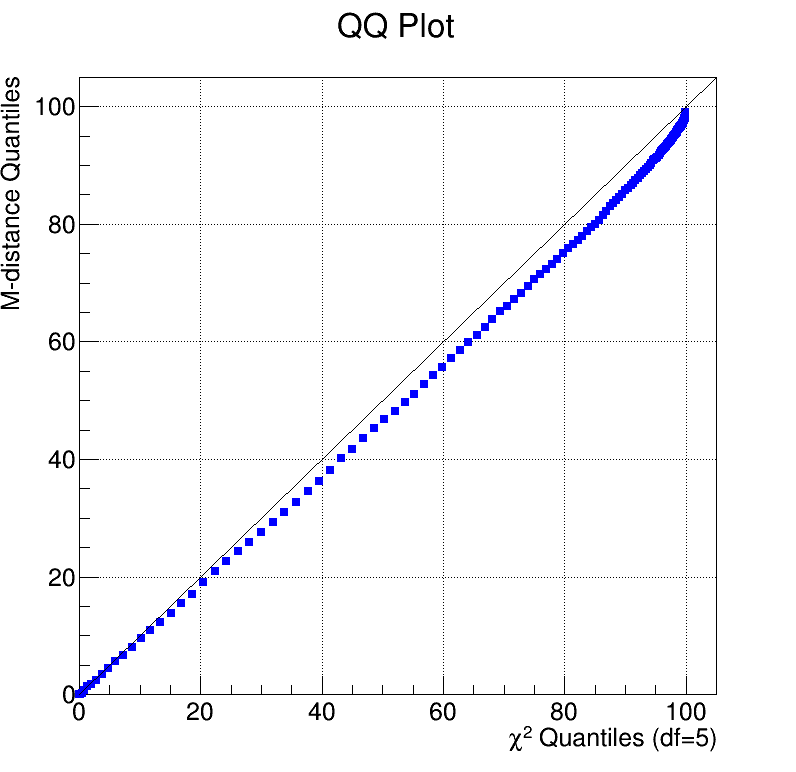

In [24]:
M_distance = array('d')
chi2_quant = array('d')

for b in range (1,hDistance.GetNbinsX()+1):
    edge = hDistance.GetBinLowEdge(b+1)
    quant = chi2.cdf(edge, 5) * 100
    integ = hDistance.Integral(1,b) / hDistance.GetEntries() * 100
    chi2_quant.append(quant)
    M_distance.append(integ)

QQ_graph = ROOT.TGraph(len(chi2_quant),chi2_quant,M_distance)

hq = ROOT.TCanvas("hq","hq",800,800)
hq.SetGrid()
QQ_graph.SetTitle("QQ Plot;#chi^{2} Quantiles (df=5);M-distance Quantiles")
QQ_graph.SetMarkerColor(4)
QQ_graph.SetMarkerSize(1)
QQ_graph.SetMarkerStyle(21)
QQ_graph.GetXaxis().SetLimits(0.,105.)                 # along X
QQ_graph.GetHistogram().SetMaximum(105.)   # along          
QQ_graph.GetHistogram().SetMinimum(0.)  #   Y
#fchi2.Draw()
l = ROOT.TLine(0.0,0.0,105,105)

QQ_graph.Draw("AP")
l.Draw("same")


hq.Draw()


## Now pair by pair

 FCN=108.016 FROM MIGRAD    STATUS=CONVERGED      74 CALLS          75 TOTAL
                     EDM=9.4952e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.03860e+00   1.95156e-02   9.94886e-05   1.93456e-04
   2  p1           9.40293e+02   1.08504e+01   5.53131e-02   2.04905e-07
 FCN=175.24 FROM MIGRAD    STATUS=CONVERGED      74 CALLS          75 TOTAL
                     EDM=1.05727e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.06629e+00   2.02108e-02   1.30985e-04  -3.15033e-02
   2  p1           9.30259e+02   1.07861e+01   6.99114e-02  -1.21960e-04
 FCN=111.428 FROM MIGRAD    STATUS=CONVERGED      76 CALLS          77 TOTAL
                     EDM=5.3168

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt15/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Covariance/MDistanceKalman_01.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt15/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Covariance/MDistanceKalman_02.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt15/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Covariance/MDistanceKalman_12.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt15/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Covariance/MDistanceKalman_03.p

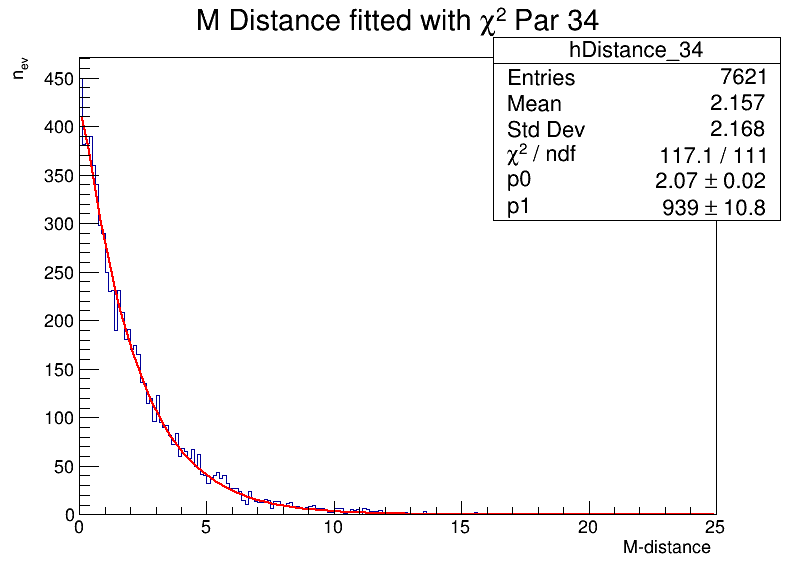

In [25]:
harray = []

for xx in range (5):
    for yy in range (xx):
        name = 'hDistance_'+str(yy)+str(xx)
        hDistance   = ROOT.TH1D( name, name, 200, 0,25 )
        harray.append(hDistance)



for iev in range(treeSeed.GetEntries()):
    treeSeed.GetEntry(iev)
    #size = treeSeed.seed.AliExternalTrackParam.size() 
    if(tree.part.fStatusMaskIn[1]!=31): continue
    #if(size==0): continue
    C=[]
    xMC=[]
    xSeed=[]

    
    #treeSeed.Print()
    for i in range(15): 
        C.append(tree.part.fParamIn[1].GetCovariance()[i]) 

    for i in range(5): 
        xMC.append(tree.part.fParamMC[1].GetParameter()[i]) 
        xSeed.append(tree.part.fParamIn[1].GetParameter()[i]) 

    S = np.array([[C[0], C[1], C[3], C[6], C[10]],
                  [C[1], C[2], C[4], C[7], C[11]],
                  [C[3], C[4], C[5], C[8], C[12]],
                  [C[6] ,C[7], C[8], C[9], C[13]],
                  [C[10],C[11],C[12],C[13],C[14]]])
    
    #print(xMC)
    #print(xSeed)
    #print(S)

    arraycounter = 0

    for xx in range (5):
        for yy in range (xx):
            #print(yy,xx)
            S2 = np.array([[S[yy][yy],S[yy][xx]],
                           [S[xx][yy],S[xx][xx]]])
            #print(S2)

            xMC2 = [xMC[yy],xMC[xx]] 

            #print(xMC2)

            xSeed2 = [xSeed[yy],xSeed[xx]]

            #print(xSeed2)

            Sinv2 = np.linalg.inv(S2)

            c = distance.mahalanobis(xMC2,xSeed2,Sinv2)
            #print(harray[arraycounter])
            harray[arraycounter].Fill(c*c)
            arraycounter+=1

arraycounter = 0
for xx in range (5):
    for yy in range (xx):
        #print(harray[arraycounter])
        fname="fchi2_"+str(yy)+str(xx)
        fchi2_2 = ROOT.TF1(fname,formula,0,15)
        fchi2_2.SetParameters(5,10000)

        Canvas = "c_"+str(yy)+str(xx)
        cM = ROOT.TCanvas(Canvas,Canvas,800,600)
        Title = "M Distance fitted with #chi^{2} Par "+str(yy)+str(xx)+";M-distance;n_{ev}"
        harray[arraycounter].SetTitle(Title)
        harray[arraycounter].Draw()
        harray[arraycounter].Fit(fchi2_2)
        cM.Draw()
        save=foldercheck+"MDistanceKalman_"+str(yy)+str(xx)+".png"
        cM.Print(save)
        arraycounter+=1    
   

## Now just excluding one

 FCN=176.234 FROM MIGRAD    STATUS=CONVERGED      35 CALLS          36 TOTAL
                     EDM=6.0699e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.19314e+00   3.13124e-02   2.03238e-04  -2.81009e-02
   2  p1           9.27965e+02   1.07731e+01   7.00293e-02  -6.13759e-05
 FCN=188.871 FROM MIGRAD    STATUS=CONVERGED      35 CALLS          36 TOTAL
                     EDM=1.64713e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.08173e+00   3.19824e-02   2.15122e-04  -4.61713e-04
   2  p1           9.25168e+02   1.07577e+01   7.23797e-02  -9.77159e-07
 FCN=155.171 FROM MIGRAD    STATUS=CONVERGED      35 CALLS          36 TOTAL
                     EDM=6.351

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt15/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Covariance/MDistanceKalman_no0.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt15/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Covariance/MDistanceKalman_no1.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt15/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Covariance/MDistanceKalman_no2.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt15/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Covariance/MDistanceKalman_n

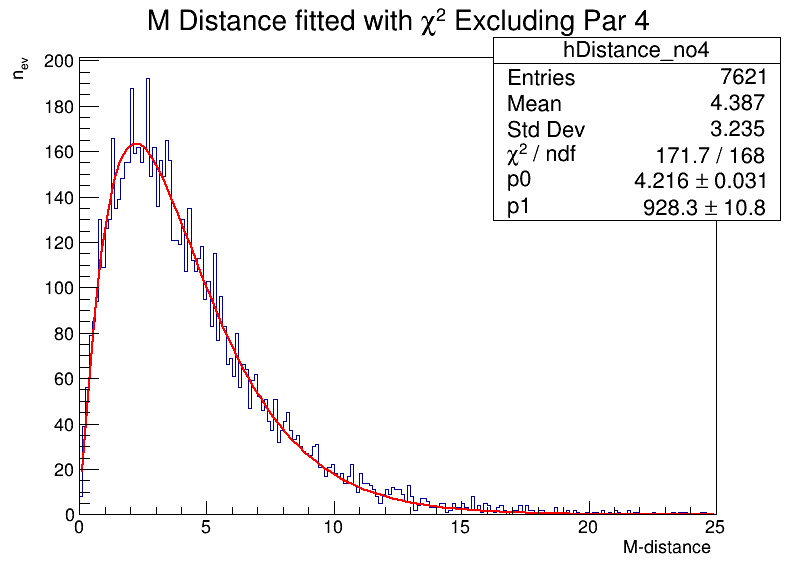

In [26]:
harray = []

for xx in range (5):
    name = 'hDistance_no'+str(xx)
    #print(name)
    hDistance   = ROOT.TH1D( name, name, 200, 0,25 )
    harray.append(hDistance)

        
for iev in range(treeSeed.GetEntries()):
    treeSeed.GetEntry(iev)
    if(tree.part.fStatusMaskIn[1]!=31): continue
    #size = treeSeed.seed.AliExternalTrackParam.size() 
    #if(size==0): continue
    C=[]
    xMC=[]
    xSeed=[]

    
    #treeSeed.Print()
    for i in range(15): 
        C.append(tree.part.fParamIn[1].GetCovariance()[i]) 

    for i in range(5): 
        xMC.append(tree.part.fParamMC[1].GetParameter()[i]) 
        xSeed.append(tree.part.fParamIn[1].GetParameter()[i]) 

    S = np.array([[C[0], C[1], C[3], C[6], C[10]],
                  [C[1], C[2], C[4], C[7], C[11]],
                  [C[3], C[4], C[5], C[8], C[12]],
                  [C[6] ,C[7], C[8], C[9], C[13]],
                  [C[10],C[11],C[12],C[13],C[14]]])
    
    #print(xMC)
    #print(xSeed)
    #print(S)

    arraycounter = 0

    for xx in range (5):
    
        #print(xx)
        S4 = []
        xMC4 = []
        xSeed4 = []

        for ii in range (5):
            row = []
            for jj in range (5):
                if(ii!=xx and jj!=xx): 
                    row.append(S[ii][jj])

            if(len(row)!=0): 
                S4.append(row)

            if(ii!=xx):
                xMC4.append(xMC[ii])
                xSeed4.append(xSeed[ii])

        #print(xMC4)
        #print(xSeed4)
        #print(S4)
        
        S4inv =  np.linalg.inv(S4)       
        
        c = distance.mahalanobis(xMC4,xSeed4,S4inv)
        harray[xx].Fill(c*c)
        
for k in range (5):
    fname="fchi2_"+str(k)
    fchi2_4 = ROOT.TF1(fname,formula,0,15)
    fchi2_4.SetParameters(4,1000)

    Canvas = "c_"+str(k)
    cM = ROOT.TCanvas(Canvas,Canvas,800,600)
    Title = "M Distance fitted with #chi^{2} Excluding Par "+str(k)+";M-distance;n_{ev}"
    harray[k].SetTitle(Title)
    harray[k].Draw()
    harray[k].Fit(fchi2_4)
    cM.Draw()
    save=foldercheck+"MDistanceKalman_no"+str(k)+".png"
    cM.Print(save)
   


# Diagonal elements unit test

 FCN=79.6292 FROM MIGRAD    STATUS=CONVERGED      52 CALLS          53 TOTAL
                     EDM=7.14414e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.38024e+02   3.33839e+00   1.20232e-02   4.29087e-04
   2  Mean        -1.69028e-02   1.16908e-02   5.12701e-05   6.96641e-03
   3  Sigma        1.01149e+00   8.15300e-03   9.61222e-06   3.80362e-01
 FCN=229.479 FROM MIGRAD    STATUS=CONVERGED      63 CALLS          64 TOTAL
                     EDM=1.23146e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.29756e+02   3.26558e+00   1.98129e-02   1.11768e-05
   2  Mean        -7.82149e-03   1.20196e-02   8.90726e-05  -1.24271e-03
   3  Sigma        1.02743e+00   

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h0
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt15/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/UnitK_p0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h1
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt15/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/UnitK_p1.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h2
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt15/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/UnitK_p2.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h3
Info in <TCanvas::

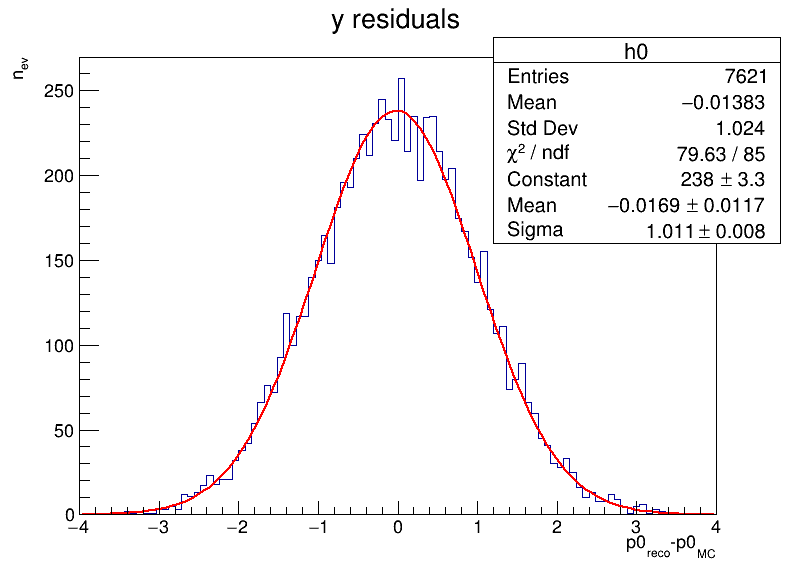

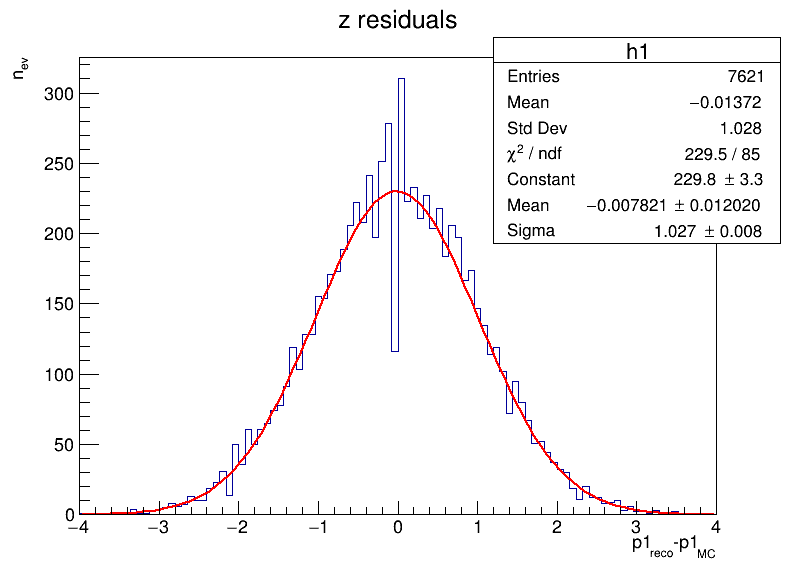

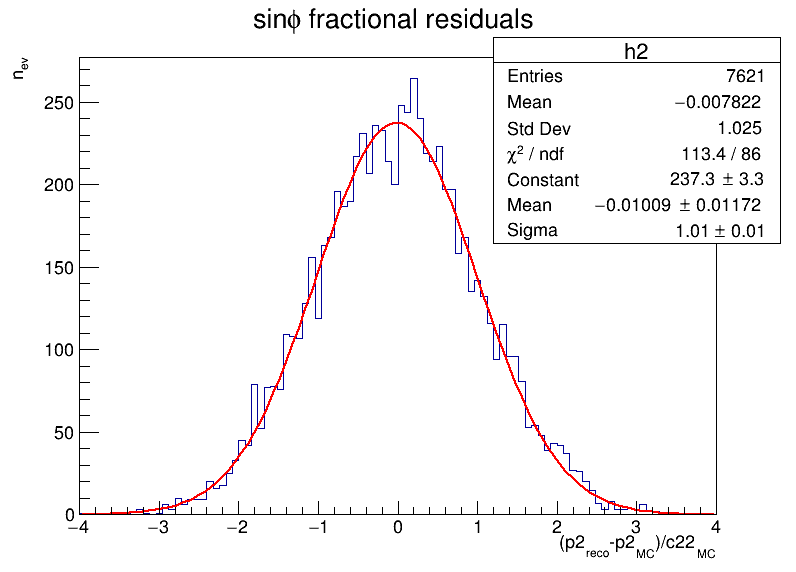

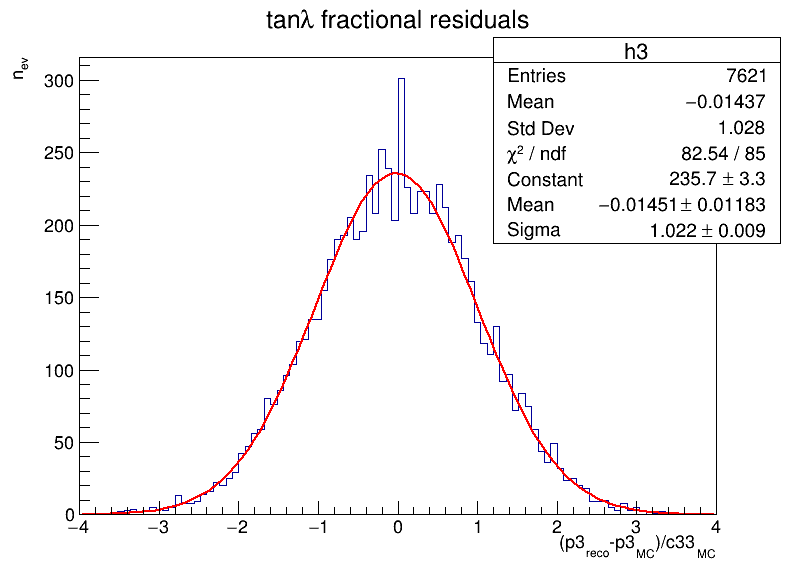

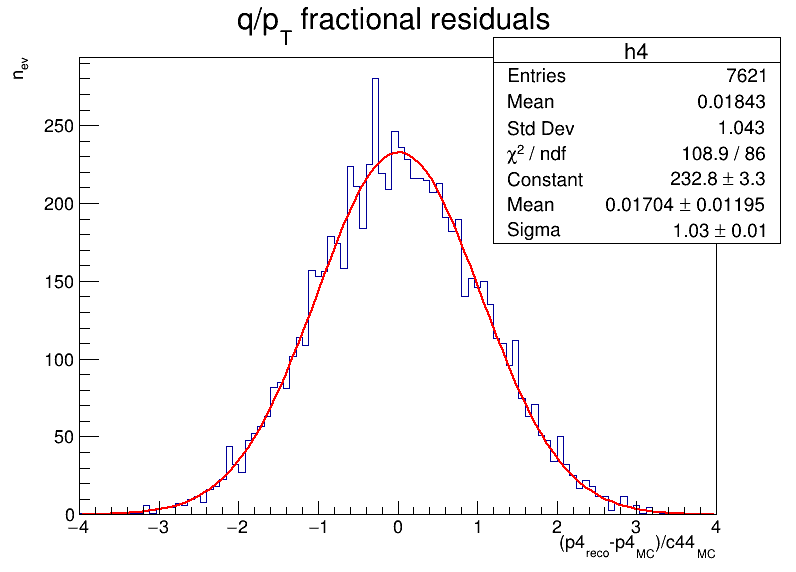

In [27]:
gStyle.SetOptStat(1)
gStyle.SetOptFit(1)

ch0 = ROOT.TCanvas("h0","h0",800,600)
#treeSeed.Draw("(p0Seed-p0MC)>>h0(100,-0.00005,0.00005)")
#treeSeed.Draw("(p0Seed-p0MC)>>h0")treeSeed.Draw("Unit2MC>>h2(100,-4,4)")
tree.Draw("Unit0MC>>h0(100,-4,4)","isOK")
histo0 = ROOT.gDirectory.Get("h0")
histo0.SetTitle("y residuals;p0_{reco}-p0_{MC};n_{ev}")
histo0.Fit("gaus")
ch0.Draw()
save=folder+"UnitK_p0"+".png"
ch0.Print(save)

ch1 = ROOT.TCanvas("h1","h1",800,600)
tree.Draw("Unit1MC>>h1(100,-4,4)","isOK")
#treeSeed.Draw("(p1Seed-p1MC)>>h1(100,-0.00005,0.00005)")
histo1 = ROOT.gDirectory.Get("h1")
histo1.SetTitle("z residuals;p1_{reco}-p1_{MC};n_{ev}")
histo1.Fit("gaus")
ch1.Draw()
save=folder+"UnitK_p1"+".png"
ch1.Print(save)

ch2 = ROOT.TCanvas("h2","h2",800,600)
tree.Draw("Unit2MC>>h2(100,-4,4)","isOK")
histo2 = ROOT.gDirectory.Get("h2")
histo2.SetTitle("sin#phi fractional residuals;(p2_{reco}-p2_{MC})/c22_{MC};n_{ev}")
histo2.Fit("gaus")
ch2.Draw()
save=folder+"UnitK_p2"+".png"
ch2.Print(save)

ch3 = ROOT.TCanvas("h3","h3",800,600)
tree.Draw("Unit3MC>>h3(100,-4,4)","isOK")
histo3 = ROOT.gDirectory.Get("h3")
histo3.SetTitle("tan#lambda fractional residuals;(p3_{reco}-p3_{MC})/c33_{MC};n_{ev}")
histo3.Fit("gaus")
ch3.Draw()
save=folder+"UnitK_p3"+".png"
ch3.Print(save)

ch4 = ROOT.TCanvas("h4","h4",800,600)
tree.Draw("Unit4MC>>h4(100,-4,4)","isOK")
histo4 = ROOT.gDirectory.Get("h4")
histo4.SetTitle("q/p_{T} fractional residuals;(p4_{reco}-p4_{MC})/c44_{MC};n_{ev}")
histo4.Fit("gaus")
ch4.Draw()
save=folder+"UnitK_p4"+".png"
ch4.Print(save)